In [178]:
import numpy as np
import qexpy as q
import qexpy.plotting as pltq
import matplotlib.pyplot as plt
import math as m
import scipy as sp

In [2]:
source, RA, DEC, Parallax, Par_error, pmRA, pmDec, Gfilt, BPRP, RadVel= np.genfromtxt("1710960115713O-result.csv", skip_header=1, unpack=True, delimiter = ",", filling_values=0)

In [202]:
# Incomplete Data Filter
Source1 = []
RA1 = []
DEC1 = []
Parallax1 = []
Par_error1 = []
pmRA1 = []
pmDec1 = []
Gfilt1 = []
BPRP1 = []
RadVel1 = []

counter = 0
for i in range(len(Par_error)):
    if RadVel[i] != 0:
        counter += 1
    
print(100*counter/len(Par_error))

print(len(Par_error))

for i in range(len(Parallax)): # Filtering out incomplete / zero data needed for the CMD
    if Parallax[i] and Gfilt[i] != 0 and BPRP[i] > 0 and Par_error[i]<1:
        Source1.append(source[i])
        RA1.append(RA[i])
        DEC1.append(DEC[i])
        Parallax1.append(Parallax[i])
        Par_error1.append(Par_error[i])
        pmRA1.append(pmRA[i])
        pmDec1.append(pmDec[i])
        Gfilt1.append(Gfilt[i])
        BPRP1.append(BPRP[i])
        RadVel1.append(RadVel[i])

print(len(RA1))
# Distance Filter      

Source2 = []
RA2 = []
DEC2 = []
Parallax2 = []
Par_error2 = []
pmRA2 = []
pmDec2 = []
Gfilt2 = []
BPRP2 = []
RadVel2 = []


minDist = 5300-300
maxDist = 5300+300

def ParaToPars(x):
    return 1000/x

for i in range(len(Source1)):
    if ParaToPars(Parallax1[i]) > minDist and ParaToPars(Parallax1[i]) < maxDist :
        Source2.append(Source1[i])
        RA2.append(RA1[i])
        DEC2.append(DEC1[i])
        Parallax2.append(Parallax1[i])
        Par_error2.append(Par_error1[i])
        pmRA2.append(pmRA1[i])
        pmDec2.append(pmDec1[i])
        Gfilt2.append(Gfilt1[i])
        BPRP2.append(BPRP1[i])
        RadVel2.append(RadVel1[i])

print(len(Parallax2))      
   
distances2 = []
for i in range(len(Parallax2)):
    distances2.append(1000/Parallax2[i])
    
print(np.mean(distances2))
print(np.std(distances2))
print(np.mean(Par_error2))
print(np.mean(Parallax2))
# Now we shall convert apparent to absolute
GfiltAbs = []

for i in range(len(Parallax2)):
    Gabs = Gfilt2[i]-5*np.log10(ParaToPars(Parallax2[i])/10)
    GfiltAbs.append(Gabs)
    
# GfiltAbs.append(0)
# BPRP2.append(-1) #just to shift the colourmap colours to a more realistic sense


1.0358230102050585
52229
30819
966
5299.881961658183
175.8810903422863
0.21706383292287787
0.18889130887363453


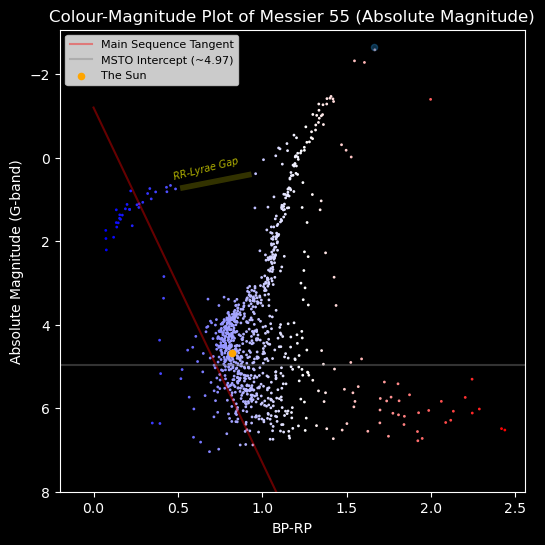

In [216]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.scatter(BPRP2,GfiltAbs, s=1, c=BPRP2, cmap = 'bwr')
ax.set_title('Colour-Magnitude Plot of Messier 55 (Absolute Magnitude)', color = 'white')
ax.invert_yaxis()
ax.set_facecolor('black')
ax.set_xlabel('BP-RP')
ax.set_ylim(8)
ax.set_ylabel('Absolute Magnitude (G-band)')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='x', colors='white')
fig.set_facecolor('black')
plt.xlim(-0.2)


xsun = [0.82] # The suns RP-BP from Gaia
ysun = [4.68] # The suns absolute magnitudein G-band

def Linear(x,a,b):
    return a*x+b

x = np.linspace(0,2,1000)
y = []
for i in range(1000):
    y.append(Linear(x[i],8.5,-1.2))

plt.plot(x,y, color = 'r' , alpha = 0.4, label = 'Main Sequence Tangent')  
plt.axhline(4.97 , color = 'grey', alpha = 0.4, label = 'MSTO Intercept (~4.97)')
RRx = [0.53,0.92]
RRy = [0.72, 0.41]
plt.plot(RRx,RRy, alpha=0.2, color = 'Yellow', linewidth=4.1)
plt.text(0.47, 0.52, 'RR-Lyrae Gap', color = 'yellow', fontsize = 7, alpha = 0.7, fontstyle = 'oblique' , rotation = 14.2)
plt.scatter(xsun,ysun,s=20, color='Orange', label = 'The Sun')
plt.legend(fontsize = 8)

plt.scatter(1.66,-2.66,alpha=0.4,s=20)

In [224]:
q.set_sig_figs_for_error(4)
MSTO = q.Measurement(4.97,0.1)

def Time(x):
    return 10*(10**((x-4.68)/(-2.5)))**(-3/4)

print(f'The estimated age of this cluster is {Time(MSTO)} Gyrs')

#Dist from TRGB
TRGB = q.Measurement(11.1,0.3)

def DistM55(x):
    return 10**(((x+3)/5)+1)

print(DistM55(TRGB))
        

The estimated age of this cluster is 12.2180 +/- 0.8440 Gyrs
6606.9 +/- 912.8


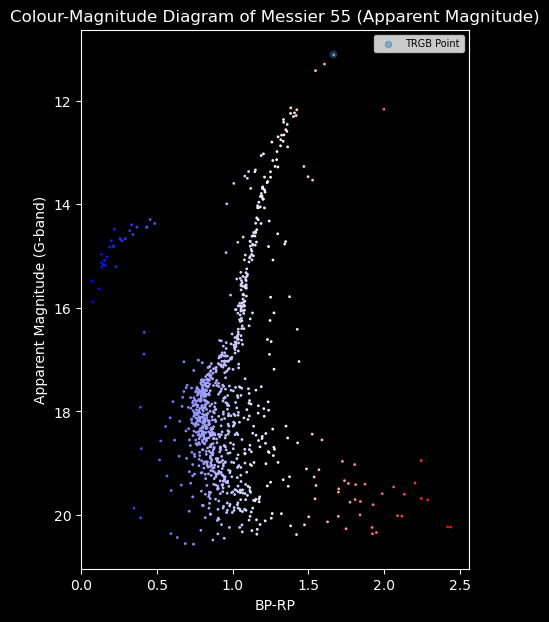

In [190]:
fig = plt.figure(figsize = (5,7))
ax = fig.add_subplot(111)
ax.scatter(BPRP2,Gfilt2, s=1, c=BPRP2, cmap = 'bwr')
ax.set_title('Colour-Magnitude Diagram of Messier 55 (Apparent Magnitude)', color = 'white')
ax.invert_yaxis()
ax.set_facecolor('black')
ax.set_xlabel('BP-RP')
ax.set_xlim(0)
ax.set_ylabel('Apparent Magnitude (G-band)')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='x', colors='white')
fig.set_facecolor('black')

plt.scatter(1.66,11.1,alpha=0.4,s=20, label = 'TRGB Point')
plt.legend(fontsize = 7)

In [191]:
SourceD = []
RAD = []
DECD = []
ParallaxD = []
Par_errorD = []
pmRAD = []
pmDecD = []
GfiltD = []
BPRPD = []
RadVelD = []

for i in range(len(Parallax2)): # Filtering out incomplete / zero data needed for the Velocity Diagram
    if Parallax[i] and Gfilt[i] and BPRP[i] and pmRA[i] and pmDec[i] != 0:
        SourceD.append(source[i])
        RAD.append(RA[i])
        DECD.append(DEC[i])
        ParallaxD.append(Parallax[i])
        Par_errorD.append(Par_error[i])
        pmRAD.append(pmRA[i])
        pmDecD.append(pmDec[i])
        GfiltD.append(Gfilt[i])
        BPRPD.append(BPRP[i])
        RadVelD.append(RadVel[i])
        
    
PMstars = []
PMstarsall = []
PMtangentall = []
PMtangent = []

len(GfiltD)
for i in range(len(pmDec1)):
    PM = np.sqrt((pmRA1[i]*np.cos(DEC1[i]))**2+(pmDec1[i])**2)
    PMstarsall.append(PM)
    PMtangentall.append(q.atan(pmDec1[i]/pmRA1[i]))

for i in range(len(pmDec2)):
    PM = np.sqrt((pmRA2[i]*np.cos(DEC2[i]))**2+(pmDec2[i])**2)
    PMstars.append(PM)
    PMtangent.append(q.atan(pmDec2[i]/pmRA2[i]))
    
print(sum(PMtangent)/len(PMtangent))

0.9568670193998446


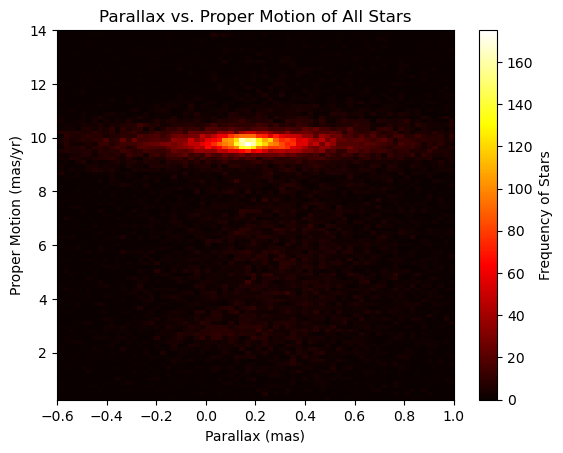

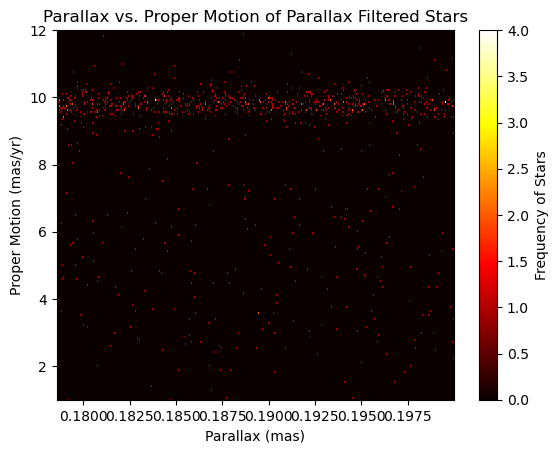

In [198]:
plt.hist2d(Parallax1, PMstarsall, bins=1100, cmap='hot')

# Adding labels and title
plt.xlabel('Parallax (mas)')
plt.ylabel('Proper Motion (mas/yr)')
plt.title('Parallax vs. Proper Motion of All Stars')
plt.xlim(-0.6,1)
plt.ylim(0.25,14)
plt.colorbar(label='Frequency of Stars')

# Displaying the plot
plt.show()

plt.hist2d(Parallax2, PMstars, bins=400, cmap='hot')

# Adding labels and title
plt.xlabel('Parallax (mas)')
plt.ylabel('Proper Motion (mas/yr)')
plt.title('Parallax vs. Proper Motion of Parallax Filtered Stars')
# Adding color bar
plt.colorbar(label='Frequency of Stars')
plt.ylim(1,12)
# Displaying the plot
plt.show()

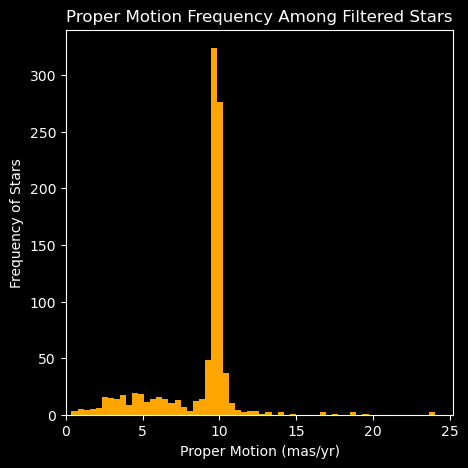

In [197]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.hist(PMstars, bins = 60, color = 'orange')
ax.set_title('Proper Motion Frequency Among Filtered Stars', color = 'white')
ax.set_facecolor('black')
ax.set_xlabel('Proper Motion (mas/yr)')
ax.set_xlim(0)
ax.set_ylabel('Frequency of Stars')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='x', colors='white')
fig.set_facecolor('black')

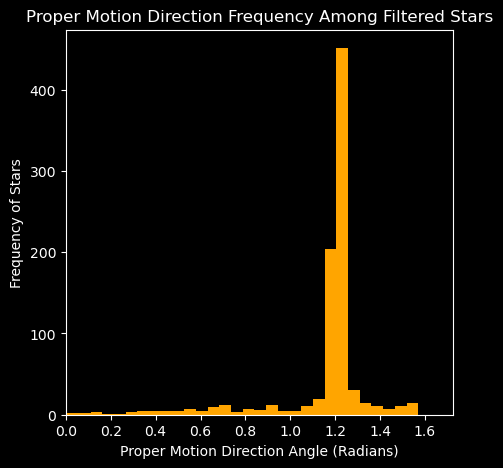

In [194]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.hist(PMtangent, bins = 60, color = 'orange')
ax.set_title('Proper Motion Direction Frequency Among Filtered Stars', color = 'white')
ax.set_facecolor('black')
ax.set_xlabel('Proper Motion Direction Angle (Radians)')
ax.set_xlim(0)
ax.set_ylabel('Frequency of Stars')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='x', colors='white')
fig.set_facecolor('black')

1837


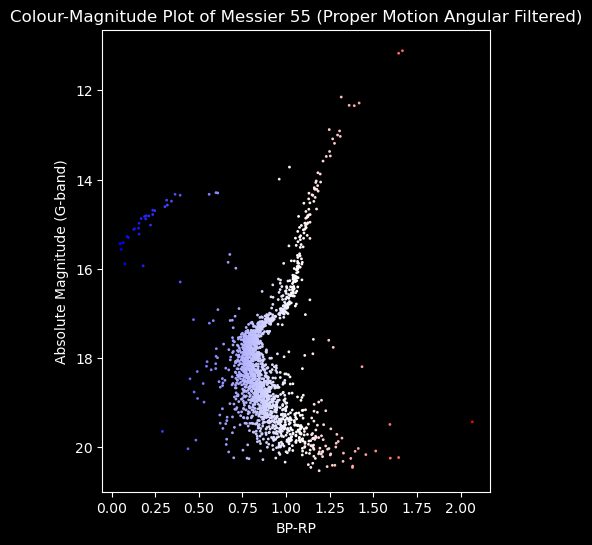

In [243]:
filtBPRP = [] 
filtG = []
for i in range(len(PMstarsall)):
    if PMstarsall[i] > 9.9 and PMstarsall[i] < 10 and PMtangentall[i]<1.3 and PMtangentall[i]>1.1:
        filtBPRP.append(BPRP1[i])
        filtG.append(Gfilt1[i])

fig = plt.figure(figsize = (5,6))
ax = fig.add_subplot(111)
ax.scatter(filtBPRP,filtG, s=1, c=filtBPRP, cmap = 'bwr')
ax.set_title('Colour-Magnitude Plot of Messier 55 (Proper Motion Angular Filtered)', color = 'white')
ax.invert_yaxis()
ax.set_facecolor('black')
ax.set_xlabel('BP-RP')
#ax.set_ylim(8)
ax.set_ylabel('Absolute Magnitude (G-band)')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='x', colors='white')
fig.set_facecolor('black')
#plt.xlim(-0.2)

print(len(filtBPRP))

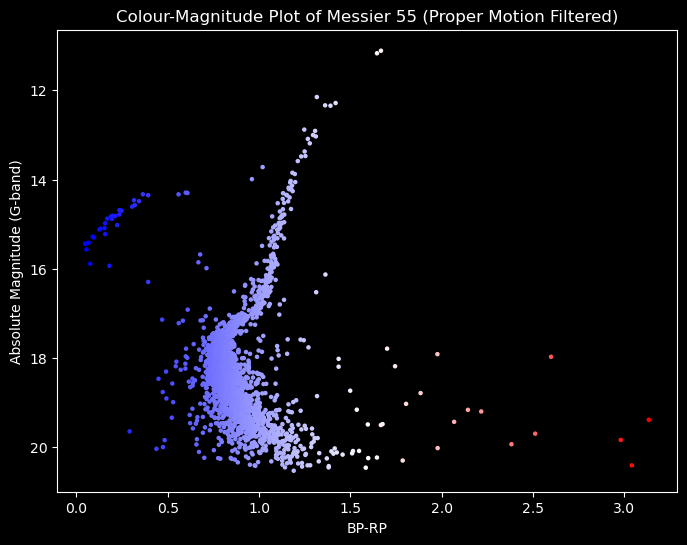

In [221]:
filtBPRP = [] 
filtG = []
for i in range(len(PMstarsall)):
    if PMstarsall[i] > 9.9 and PMstarsall[i] < 10:
        filtBPRP.append(BPRP1[i])
        filtG.append(Gfilt1[i])

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
ax.scatter(filtBPRP,filtG, s=5, c=filtBPRP, cmap = 'bwr')
ax.set_title('Colour-Magnitude Plot of Messier 55 (Proper Motion Filtered)', color = 'white')
ax.invert_yaxis()
ax.set_facecolor('black')
ax.set_xlabel('BP-RP')
#ax.set_ylim(8)
ax.set_ylabel('Absolute Magnitude (G-band)')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='x', colors='white')
fig.set_facecolor('black')
#plt.xlim(-0.2)